In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import time
import argparse
import pickle
import torch
import torch.optim as optim
import torch.nn.functional as F
from scipy.sparse import coo_matrix
# from model import MDANet
from utils import get_logger
from utils import data_loader
from utils import multi_data_loader
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
name="NILM_REFIT"
verbose=True
frac=1.0
seed=42
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())


# Set random number seed.
logger = get_logger(name)
np.random.seed(seed)
torch.manual_seed(seed)

True


In [3]:
#####################################################Regression#######################################
import pandas as pd
from sklearn.model_selection import train_test_split
def dataProvider(file,windowsize,threshold):  
    dataframe=pd.read_csv(file,header=0)    
    np_array=np.array(dataframe)
    inputs, targets=np_array[:, 0], np_array[:, 1]
    offset = int(0.5 * (windowsize - 1.0))
    window_num=inputs.size - 2 * offset
    features=list()
    labels=list()
    for i in range(0,window_num):
        data_in=inputs[i:i+windowsize]
        tar=targets[i+offset]
        features.append(data_in)
        labels.append(tar)
    X=np.array(features)
    Y=np.array(labels)
    Y[Y<=threshold] = 0
    x_train_all, x_predict, y_train_all, y_predict = train_test_split(X, Y, test_size=0.02,random_state=100)
    return x_predict,y_predict


In [2]:
#####################################################Regression#######################################
import pandas as pd
from sklearn.model_selection import train_test_split
def Aggdata(file,threshold):  
    dataframe=pd.read_csv(file,header=0)    
    np_array=np.array(dataframe)
    inputs, targets=np_array[:, 0], np_array[:, 1]
    targets[targets<=threshold]=0
#     targets[targets>threshold1]=0
    return inputs,targets

In [3]:
trainfile1="F:/NILM/refit_training/dishwasher/dishwasher_house_9_training_.csv"
trainfile2="F:/NILM/refit_training/dishwasher/dishwasher_house_13_training_.csv"
trainfile3="F:/NILM/refit_training/dishwasher/dishwasher_house_16_training_.csv"
trainfile4="F:/NILM/refit_training/dishwasher/dishwasher_house_18_training_.csv"
trainfile5="F:/NILM/refit_training/dishwasher/dishwasher_house_20_training_.csv"  
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5]
data_insts, data_labels, num_insts = [], [], []
threshold=10
for i in range(len(fileList)):
    X,Y=dataProvider(fileList[i], 19,threshold)
    data_insts.append(X)
    data_labels.append(Y)
    num_insts.append(X.shape[0])
    r_order = np.arange(num_insts[i])
    np.random.shuffle(r_order)
    data_insts[i] = data_insts[i][r_order, :]
    data_labels[i] = data_labels[i][r_order].reshape(-1,1)
data_name={"house_4","house_10","house_12","house_17","house_19",}
logger.info("Data sets: {}".format(data_name))
logger.info("Number of total instances in the data sets: {}".format(num_insts))
input_dim = 19
results = {}

KeyboardInterrupt: 

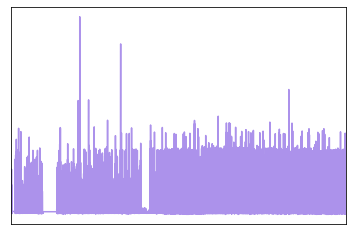

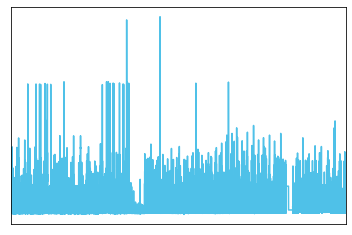

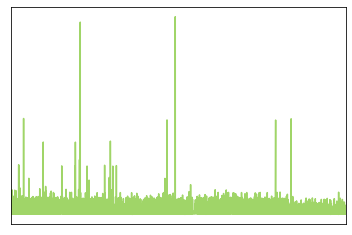

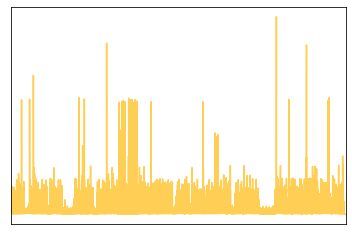

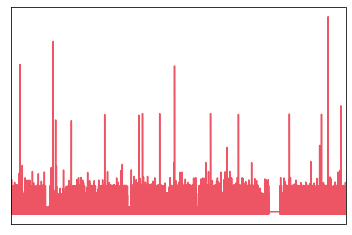

In [33]:
trainfile1="F:/NILM/refit_training/dishwasher/dishwasher_house_9_training_.csv"
trainfile2="F:/NILM/refit_training/dishwasher/dishwasher_house_13_training_.csv"
trainfile3="F:/NILM/refit_training/dishwasher/dishwasher_house_16_training_.csv"
trainfile4="F:/NILM/refit_training/dishwasher/dishwasher_house_18_training_.csv"
trainfile5="F:/NILM/refit_training/dishwasher/dishwasher_house_20_training_.csv" 
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5]
colorList=["#AC92EB","#4FC1E8","#A0D568","#FFCE54","#ED5564"]
data_insts, data_labels, num_insts = [], [], []
for i in range(len(fileList)):
    dataframe=pd.read_csv(fileList[i],header=0)
    dataframe.iloc[:,0].plot(color=colorList[i])
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [4]:
trainfile1="F:/NILM/ukdale_training/fridge_house_1_training_.csv"
trainfile2="F:/NILM/ukdale_training/fridge_house_2_training_.csv"
fileList=[trainfile1,trainfile2]
data_insts, data_labels, num_insts = [], [], []
threshold=10
for i in range(len(fileList)):
    X,Y=dataProvider(fileList[i], 19,threshold)
    data_insts.append(X)
    data_labels.append(Y)
    num_insts.append(X.shape[0])
    r_order = np.arange(num_insts[i])
    np.random.shuffle(r_order)
    data_insts[i] = data_insts[i][r_order, :]
    data_labels[i] = data_labels[i][r_order].reshape(-1,1)
data_name={"house_4","house_10","house_12","house_17","house_19",}
logger.info("Data sets: {}".format(data_name))
logger.info("Number of total instances in the data sets: {}".format(num_insts))
input_dim = 19
results = {}

03-29 09:52 [MainProcess, 3120] [INFO ]  Data sets: {'house_19', 'house_10', 'house_12', 'house_4', 'house_17'}
03-29 09:52 [MainProcess, 3120] [INFO ]  Number of total instances in the data sets: [333608, 25880]


In [6]:
trainfile1="F:/NILM/training_data/fridge_test_.csv"
trainfile2="F:/NILM/training_data/fridge_house_2_training_.csv"
trainfile3="F:/NILM/training_data/fridge_house_3_training_.csv"
fileList=[trainfile1,trainfile2,trainfile3]
data_insts, data_labels, num_insts = [], [], []
threshold=10
for i in range(len(fileList)):
    X,Y=dataProvider(fileList[i], 19,threshold)
    data_insts.append(X)
    data_labels.append(Y)
    num_insts.append(X.shape[0])
    r_order = np.arange(num_insts[i])
    np.random.shuffle(r_order)
    data_insts[i] = data_insts[i][r_order, :]
    data_labels[i] = data_labels[i][r_order].reshape(-1,1)
data_name={"house_4","house_10","house_12","house_17","house_19",}
logger.info("Data sets: {}".format(data_name))
logger.info("Number of total instances in the data sets: {}".format(num_insts))
input_dim = 19
results = {}

03-29 09:53 [MainProcess, 3120] [INFO ]  Data sets: {'house_19', 'house_10', 'house_12', 'house_4', 'house_17'}
03-29 09:53 [MainProcess, 3120] [INFO ]  Number of total instances in the data sets: [3941, 3004, 3671]


In [7]:
sum=0
for i in range(len(fileList)):
    sum+=num_insts[i]
sum

10616

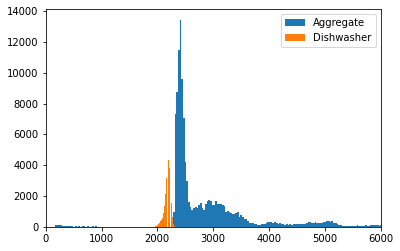

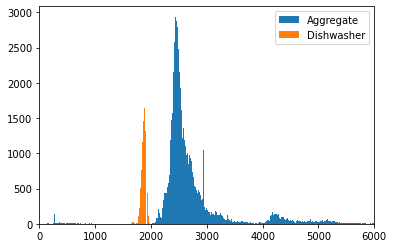

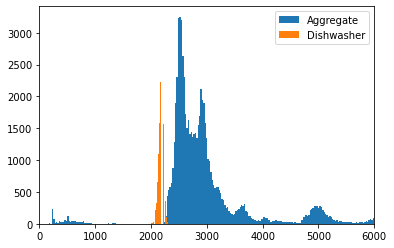

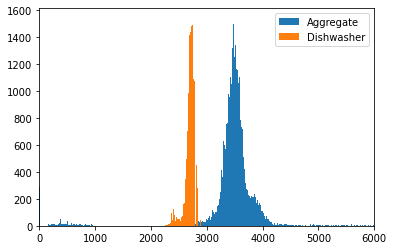

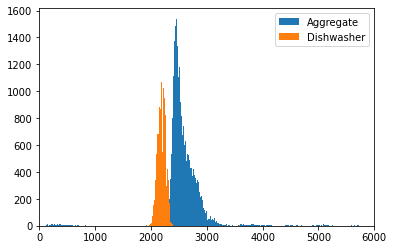

In [37]:
trainfile1="F:/NILM/refit_training/dishwasher/dishwasher_house_9_training_.csv"
trainfile2="F:/NILM/refit_training/dishwasher/dishwasher_house_13_training_.csv"
trainfile3="F:/NILM/refit_training/dishwasher/dishwasher_house_16_training_.csv"
trainfile4="F:/NILM/refit_training/dishwasher/dishwasher_house_18_training_.csv"
trainfile5="F:/NILM/refit_training/dishwasher/dishwasher_house_20_training_.csv"  
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5]
threshold=1000
# threshold1=5000
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]

    plt.hist(X_on,bins='auto',label='Aggregate')
    plt.hist(Y_on,bins='auto',label='Dishwasher')
    plt.xlim([0,6000])
    plt.legend()
#     plt.plot(range(len(X)),X)
#     plt.plot(range(len(Y_on)),Y_on)
#     plt.plot(range(10000),Y[:10000]) 
    plt.show()

In [ ]:
trainfile1="F:/NILM/refit_training/fridge/fridge_house_2_training_.csv"
trainfile2="F:/NILM/refit_training/fridge/fridge_house_5_training_.csv"
trainfile3="F:/NILM/refit_training/fridge/fridge_house_9_training_.csv"
trainfile4="F:/NILM/refit_training/fridge/fridge_house_12_training_.csv"
trainfile5="F:/NILM/refit_training/fridge/fridge_house_15_training_.csv"  
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5]
data_insts, data_labels, num_insts = [], [], []
threshold=50
for i in range(len(fileList)):
    X,Y=dataProvider(fileList[i], 19,threshold)
    data_insts.append(X)
    data_labels.append(Y)
    num_insts.append(X.shape[0])
    r_order = np.arange(num_insts[i])
    np.random.shuffle(r_order)
    data_insts[i] = data_insts[i][r_order, :]
    data_labels[i] = data_labels[i][r_order].reshape(-1,1)
data_name={"house_4","house_10","house_12","house_17","house_19",}
logger.info("Data sets: {}".format(data_name))
logger.info("Number of total instances in the data sets: {}".format(num_insts))
input_dim = 19
results = {}

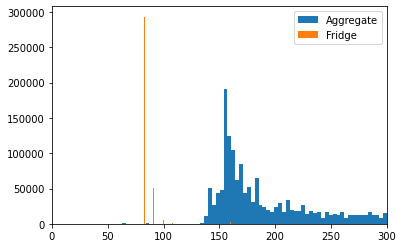

In [ ]:
trainfile1="F:/NILM/refit_training/fridge/fridge_house_2_training_.csv"
trainfile2="F:/NILM/refit_training/fridge/fridge_house_5_training_.csv"
trainfile3="F:/NILM/refit_training/fridge/fridge_house_9_training_.csv"
trainfile4="F:/NILM/refit_training/fridge/fridge_house_12_training_.csv"
trainfile5="F:/NILM/refit_training/fridge/fridge_house_15_training_.csv"  
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5]
threshold=10
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    plt.hist(X_on,bins='auto',label='Aggregate')
    plt.hist(Y_on,bins='auto',label='Fridge')
    plt.xlim([0,300])
#     plt.plot(range(3000),Y[2000:5000])
    plt.legend()
    plt.show()

In [ ]:
trainfile1="F:/NILM/refit_training/washingmachine/washingmachine_house_9_training_.csv"
trainfile2="F:/NILM/refit_training/washingmachine/washingmachine_house_15_training_.csv"
trainfile3="F:/NILM/refit_training/washingmachine/washingmachine_house_16_training_.csv"
trainfile4="F:/NILM/refit_training/washingmachine/washingmachine_house_17_training_.csv"
trainfile5="F:/NILM/refit_training/washingmachine/washingmachine_house_18_training_.csv"  
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5]
data_insts, data_labels, num_insts = [], [], []
threshold=200
for i in range(len(fileList)):
    X,Y=dataProvider(fileList[i], 19,threshold)
    data_insts.append(X)
    data_labels.append(Y)
    num_insts.append(X.shape[0])
    r_order = np.arange(num_insts[i])
    np.random.shuffle(r_order)
    data_insts[i] = data_insts[i][r_order, :]
    data_labels[i] = data_labels[i][r_order].reshape(-1,1)
data_name={"house_4","house_10","house_12","house_17","house_19",}
logger.info("Data sets: {}".format(data_name))
logger.info("Number of total instances in the data sets: {}".format(num_insts))
input_dim = 19
results = {}

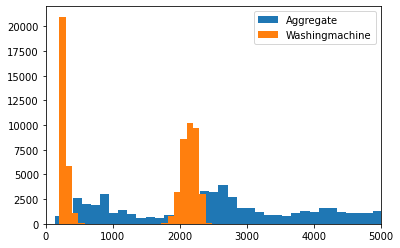

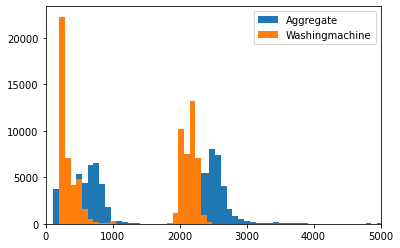

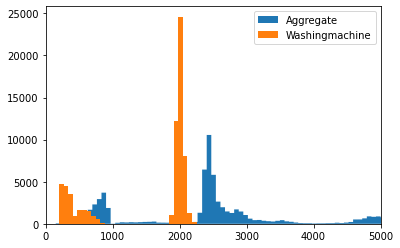

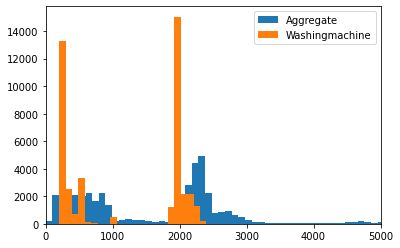

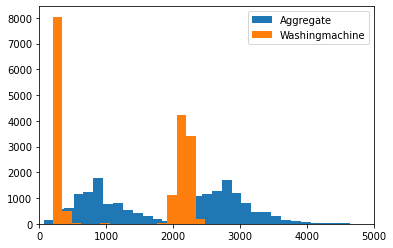

In [46]:
trainfile1="F:/NILM/refit_training/washingmachine/washingmachine_house_9_training_.csv"
trainfile2="F:/NILM/refit_training/washingmachine/washingmachine_house_15_training_.csv"
trainfile3="F:/NILM/refit_training/washingmachine/washingmachine_house_16_training_.csv"
trainfile4="F:/NILM/refit_training/washingmachine/washingmachine_house_17_training_.csv"
trainfile5="F:/NILM/refit_training/washingmachine/washingmachine_house_18_training_.csv"  
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5]
threshold=200
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    plt.hist(X_on,bins='auto',label='Aggregate', histtype='stepfilled')
    plt.hist(Y_on,bins='auto',label='Washingmachine',histtype='stepfilled')
    plt.xlim([0,5000])
    plt.legend()
    plt.show()

In [ ]:
trainfile1="F:/NILM/refit_training/microwave/microwave_house_4_training_.csv"
trainfile2="F:/NILM/refit_training/microwave/microwave_house_10_training_.csv"
trainfile3="F:/NILM/refit_training/microwave/microwave_house_12_training_.csv"
trainfile4="F:/NILM/refit_training/microwave/microwave_house_17_training_.csv"
trainfile5="F:/NILM/refit_training/microwave/microwave_house_19_training_.csv"  
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5]
data_insts, data_labels, num_insts = [], [], []
threshold=200
for i in range(len(fileList)):
    X,Y=dataProvider(fileList[i], 19,threshold)
    data_insts.append(X)
    data_labels.append(Y)
    num_insts.append(X.shape[0])
    r_order = np.arange(num_insts[i])
    np.random.shuffle(r_order)
    data_insts[i] = data_insts[i][r_order, :]
    data_labels[i] = data_labels[i][r_order].reshape(-1,1)
data_name={"house_4","house_10","house_12","house_17","house_19",}
logger.info("Data sets: {}".format(data_name))
logger.info("Number of total instances in the data sets: {}".format(num_insts))
input_dim = 19
results = {}

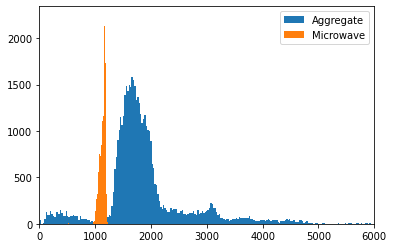

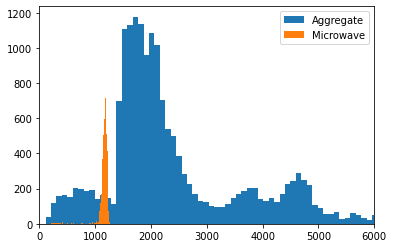

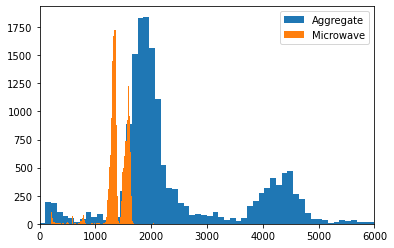

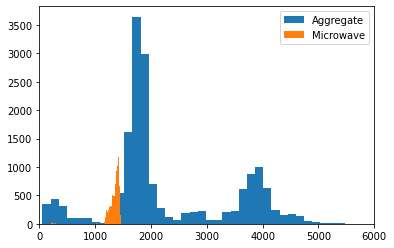

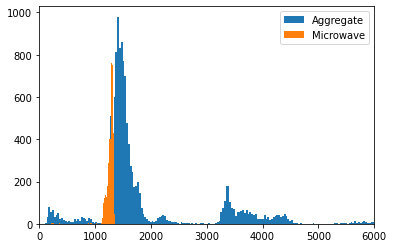

In [23]:
trainfile1="F:/NILM/refit_training/microwave/microwave_house_4_training_.csv"
trainfile2="F:/NILM/refit_training/microwave/microwave_house_10_training_.csv"
trainfile3="F:/NILM/refit_training/microwave/microwave_house_12_training_.csv"
trainfile4="F:/NILM/refit_training/microwave/microwave_house_17_training_.csv"
trainfile5="F:/NILM/refit_training/microwave/microwave_house_19_training_.csv"  
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5]
threshold=200
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    plt.hist(X_on,bins='auto',label='Aggregate')
    plt.hist(Y_on,bins='auto',label='Microwave')
    plt.xlim([0,6000])
    plt.legend()
    plt.show()

In [ ]:
trainfile1="F:/NILM/refit_training/kettle/kettle_house_2_training_.csv"
trainfile2="F:/NILM/refit_training/kettle/kettle_house_3_training_.csv"
trainfile3="F:/NILM/refit_training/kettle/kettle_house_4_training_.csv"
trainfile4="F:/NILM/refit_training/kettle/kettle_house_5_training_.csv"
trainfile5="F:/NILM/refit_training/kettle/kettle_house_6_training_.csv"  
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5]
data_insts, data_labels, num_insts = [], [], []
threshold=200
for i in range(len(fileList)):
    X,Y=dataProvider(fileList[i], 19,threshold)
    data_insts.append(X)
    data_labels.append(Y)
    num_insts.append(X.shape[0])
    r_order = np.arange(num_insts[i])
    np.random.shuffle(r_order)
    data_insts[i] = data_insts[i][r_order, :]
    data_labels[i] = data_labels[i][r_order].reshape(-1,1)
data_name={"house_4","house_10","house_12","house_17","house_19",}
logger.info("Data sets: {}".format(data_name))
logger.info("Number of total instances in the data sets: {}".format(num_insts))
input_dim = 19
results = {}

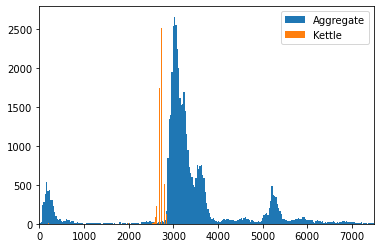

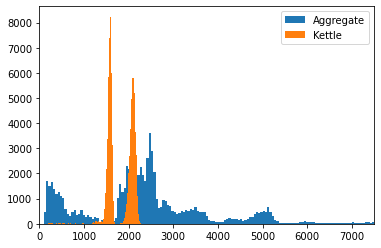

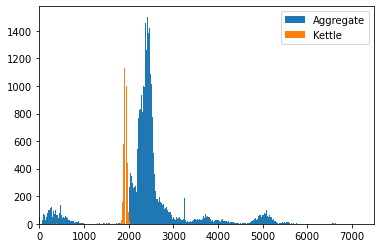

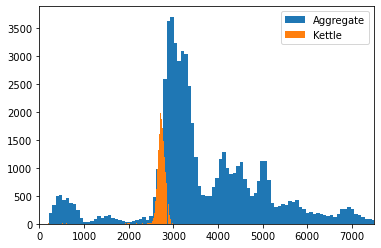

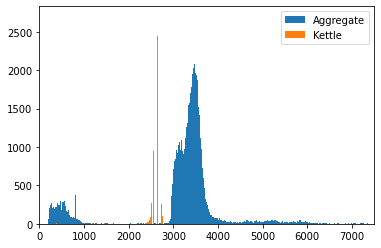

In [30]:
trainfile1="F:/NILM/refit_training/kettle/kettle_house_2_training_.csv"
trainfile2="F:/NILM/refit_training/kettle/kettle_house_3_training_.csv"
trainfile3="F:/NILM/refit_training/kettle/kettle_house_4_training_.csv"
trainfile4="F:/NILM/refit_training/kettle/kettle_house_5_training_.csv"
trainfile5="F:/NILM/refit_training/kettle/kettle_house_6_training_.csv"  
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5]
threshold=200
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    plt.hist(X_on,bins='auto',label='Aggregate')
    plt.hist(Y_on,bins='auto',label='Kettle')
    plt.xlim([0,7500])
    plt.legend()
    plt.show()

06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBU

06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal 300 normal>) = 10.145
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Century Schoolbook' (SCHLBKB.TTF) normal normal 700 normal>) = 10.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Candara' (Candara.ttf) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic nor

06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 600 normal>) = 11.24
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 6.8986363636363635
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Centaur' (CENTAUR.TTF)

06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal 700 normal>) = 11.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Eras Medium ITC' (ERASMD.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Calisto MT' (CALIST.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Curlz MT' (CURLZ___.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'TeamViewer15' (teamviewer15.otf) normal 

06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal 400 condensed>) = 10.25
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 10.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal no

06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Candara' (Candarali.ttf) italic normal 400 normal>) = 11.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'LiSu' (SIMLI.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
06-28 1

06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'STXinwei' (STXINWEI.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 10.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Pristina' (PRISTINA.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 3.9713636363636367
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal nor

06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal 700 normal>) = 10.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 11.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Agency FB' (AGENCYB.TTF) normal normal 700 norm

06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal 800 normal>) = 10.43
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal 700 normal>) = 11.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Arial' (arialbi.ttf) italic normal 700 normal>) = 7.698636363636363
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal 900 normal>) = 11.525
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal norma

06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal 500 normal>) = 10.145
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 

06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Bell MT' (BELL.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'STCaiyun' (STCAIYUN.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal

06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Gill Sans MT' (GIL_____.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Parchment' (PARCHM.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.0975
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.145
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'DengXian' (Deng.ttf) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.335
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
06-28 16:05 [MainProcess, 15224] [DEBUG]  findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal norm

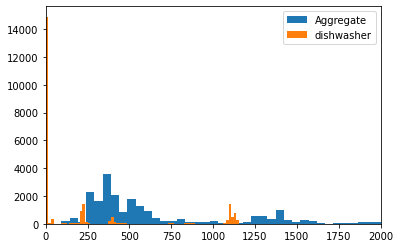

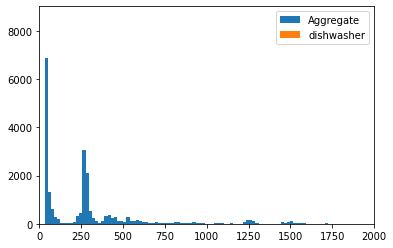

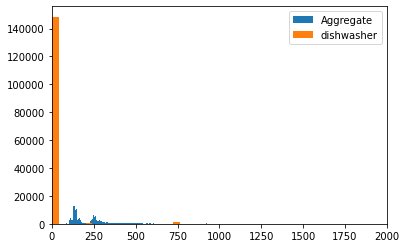

In [4]:
trainfile1="F:/NILM/training_data/dishwasher_test_.csv"
trainfile2="F:/NILM/training_data/dishwasher_house_2_training_.csv"
trainfile3="F:/NILM/training_data/dishwasher_house_3_training_.csv"
fileList=[trainfile1,trainfile2,trainfile3]
threshold=0
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    plt.hist(X_on,bins='auto',label='Aggregate')
    plt.hist(Y_on,bins='auto',label='dishwasher')
    plt.xlim([0,2000])
    plt.legend()
    plt.show()

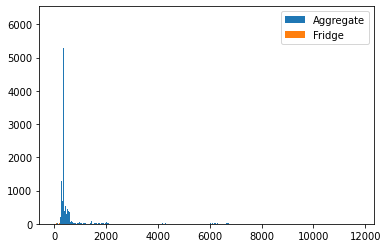

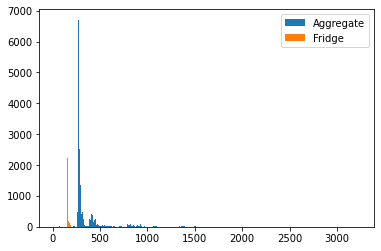

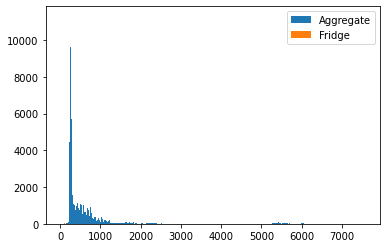

In [54]:
trainfile1="F:/NILM/training_data/fridge_test_.csv"
trainfile2="F:/NILM/training_data/fridge_house_2_training_.csv"
trainfile3="F:/NILM/training_data/fridge_house_3_training_.csv"
fileList=[trainfile1,trainfile2,trainfile3]
threshold=20
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    plt.hist(X_on,bins='auto',label='Aggregate')
    plt.hist(Y_on,bins='auto',label='Fridge')
#     plt.xlim([0,7500])
    plt.legend()
    plt.show()

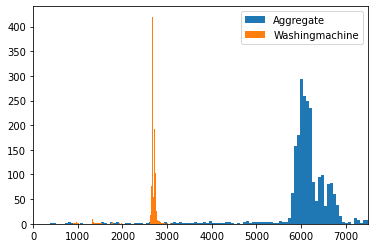

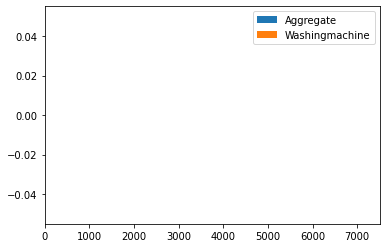

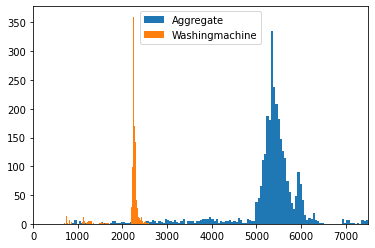

In [66]:
trainfile1="F:/NILM/training_data/washingmachine_test_.csv"
trainfile2="F:/NILM/training_data/washingmachine_house_2_training_.csv"
trainfile3="F:/NILM/training_data/washingmachine_house_3_training_.csv"
fileList=[trainfile1,trainfile2,trainfile3]
threshold=50
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    plt.hist(X_on,bins='auto',label='Aggregate')
    plt.hist(Y_on,bins='auto',label='Washingmachine')
    plt.xlim([0,7500])
    plt.legend()
    plt.show()

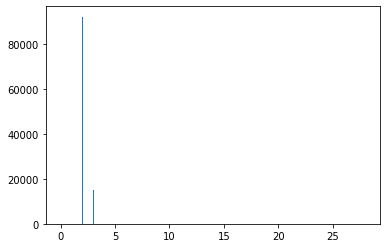

In [65]:
trainfile2="F:/NILM/training_data/washingmachine_house_2_training_.csv"
X,Y=Aggdata(trainfile2,threshold)
# plt.plot(range(len(Y)),Y)
plt.hist(Y,bins='auto',label='Washingmachine')
plt.show()

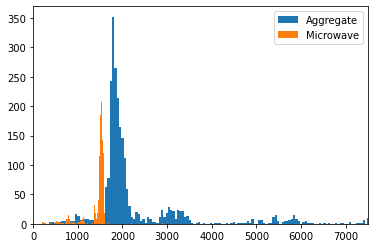

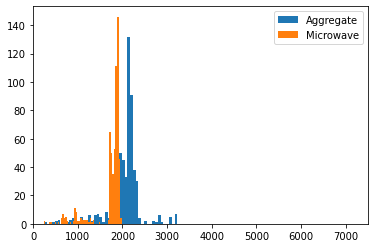

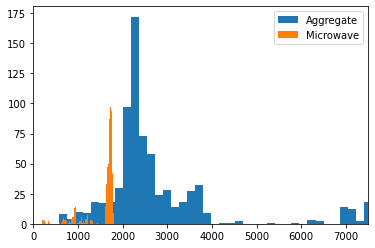

In [51]:
trainfile1="F:/NILM/training_data/Microwave_test_.csv"
trainfile2="F:/NILM/training_data/Microwave_house_2_training_.csv"
trainfile3="F:/NILM/training_data/Microwave_house_3_training_.csv"
fileList=[trainfile1,trainfile2,trainfile3]
threshold=200
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    plt.hist(X_on,bins='auto',label='Aggregate')
    plt.hist(Y_on,bins='auto',label='Microwave')
    plt.xlim([0,7500])
    plt.legend()
    plt.show()

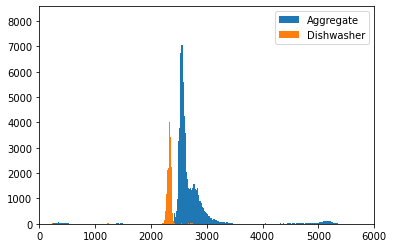

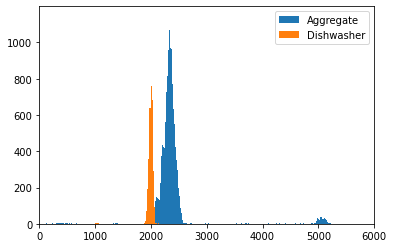

In [11]:
trainfile1="F:/NILM/ukdale_training/dishwasher_house_1_training_.csv"
trainfile2="F:/NILM/ukdale_training/dishwasher_house_2_training_.csv"
fileList=[trainfile1,trainfile2]
threshold=200
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    plt.hist(X_on,bins='auto',label='Aggregate')
    plt.hist(Y_on,bins='auto',label='Dishwasher')
    plt.xlim([0,6000])
    plt.legend()
    plt.show()

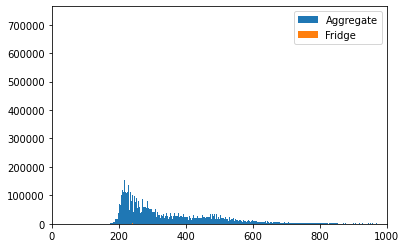

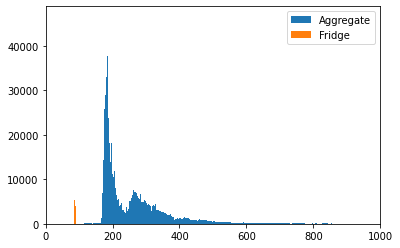

In [12]:
trainfile1="F:/NILM/ukdale_training/fridge_house_1_training_.csv"
trainfile2="F:/NILM/ukdale_training/fridge_house_2_training_.csv"
fileList=[trainfile1,trainfile2]
threshold=20
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    plt.hist(X_on,bins='auto',label='Aggregate')
    plt.hist(Y_on,bins='auto',label='Fridge')
    plt.xlim([0,1000])
    plt.legend()
    plt.show()

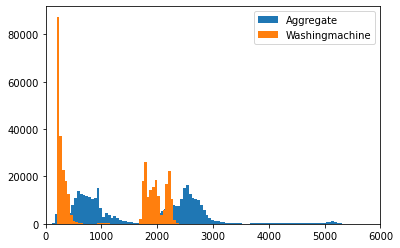

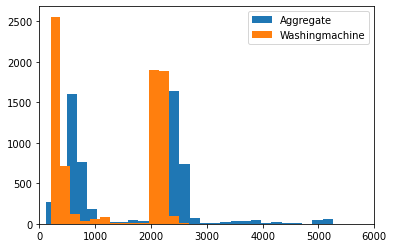

In [9]:
trainfile1="F:/NILM/ukdale_training/washingmachine_house_1_training_.csv"
trainfile2="F:/NILM/ukdale_training/washingmachine_house_2_training_.csv"
fileList=[trainfile1,trainfile2]
threshold=200
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    plt.hist(X_on,bins='auto',label='Aggregate')
    plt.hist(Y_on,bins='auto',label='Washingmachine')
    plt.xlim([0,6000])
    plt.legend()
    plt.show()

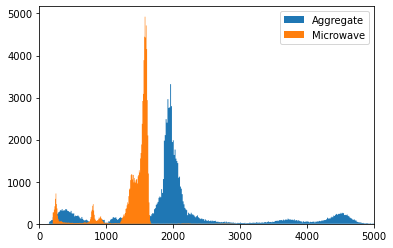

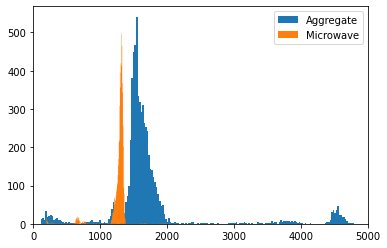

In [13]:
trainfile1="F:/NILM/ukdale_training/Microwave_house_1_training_.csv"
trainfile2="F:/NILM/ukdale_training/Microwave_house_2_training_.csv"
fileList=[trainfile1,trainfile2]
threshold=200
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    plt.hist(X_on,bins='auto',label='Aggregate',histtype='stepfilled')
    plt.hist(Y_on,bins='auto',label='Microwave',histtype='stepfilled')
    plt.xlim([0,5000])
    plt.legend()
    plt.show()

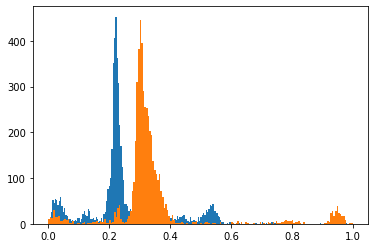

In [35]:
trainfile1="F:/NILM/ukdale_training/Microwave_house_1_training_.csv"
trainfile2="F:/NILM/ukdale_training/Microwave_house_2_training_.csv"
fileList=[trainfile1,trainfile2]
threshold=200
x_list=[]
y_list=[]
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    
    ridx = np.random.choice(X_on.shape[0], 5000)

    X_on= X_on[ridx]
    scaler_x = MinMaxScaler()
    X_on=X_on.reshape(-1,1)
    scaler_x.fit(X_on)
    X=scaler_x.transform(X_on)
#     print(X.shape)
#     plt.hist(X,bins='auto',label='house1',histtype='stepfilled')
    plt.hist(X,bins='auto',label='house1')
#     plt.show()

(365578,)
(7489,)


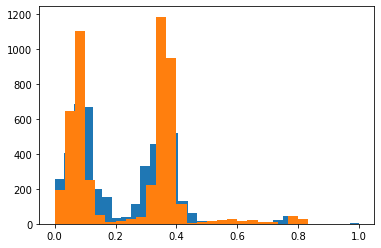

In [34]:
trainfile1="F:/NILM/ukdale_training/washingmachine_house_1_training_.csv"
trainfile2="F:/NILM/ukdale_training/washingmachine_house_2_training_.csv"
fileList=[trainfile1,trainfile2]
threshold=200
x_list=[]
y_list=[]
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    print(X_on.shape)
    ridx = np.random.choice(X_on.shape[0], 5000)

    X_on= X_on[ridx]
    scaler_x = MinMaxScaler()
    X_on=X_on.reshape(-1,1)
    scaler_x.fit(X_on)
    X=scaler_x.transform(X_on)
    plt.hist(X,bins='auto',label='house1')

(209745,)
(921,)


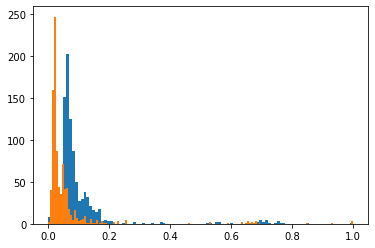

In [37]:
trainfile1="F:/NILM/ukdale_training/fridge_house_1_training_.csv"
trainfile2="F:/NILM/ukdale_training/fridge_house_2_training_.csv"
fileList=[trainfile1,trainfile2]
threshold=200
x_list=[]
y_list=[]
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    print(X_on.shape)
    ridx = np.random.choice(X_on.shape[0], 900)

    X_on= X_on[ridx]
    scaler_x = MinMaxScaler()
    X_on=X_on.reshape(-1,1)
    scaler_x.fit(X_on)
    X=scaler_x.transform(X_on)
    plt.hist(X,bins='auto',label='house1')

(2489,)
(593,)
(723,)


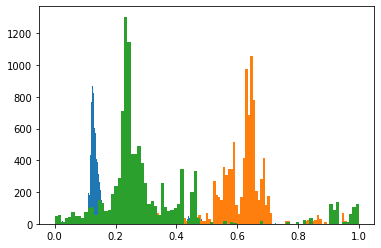

In [40]:
trainfile1="F:/NILM/training_data/Microwave_test_.csv"
trainfile2="F:/NILM/training_data/Microwave_house_2_training_.csv"
trainfile3="F:/NILM/training_data/Microwave_house_3_training_.csv"
fileList=[trainfile1,trainfile2,trainfile3]
threshold=200
x_list=[]
y_list=[]
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    print(X_on.shape)
    ridx = np.random.choice(X_on.shape[0], 10000)

    X_on= X_on[ridx]
    scaler_x = MinMaxScaler()
    X_on=X_on.reshape(-1,1)
    scaler_x.fit(X_on)
    X=scaler_x.transform(X_on)
    plt.hist(X,bins='auto',label='house1')

(8461,)
(2489,)
(1879,)


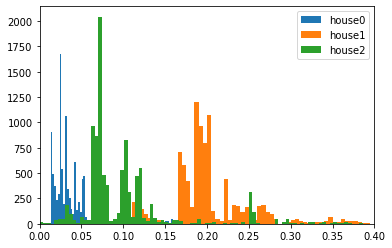

In [51]:
trainfile1="F:/NILM/training_data/Fridge_test_.csv"
trainfile2="F:/NILM/training_data/Fridge_house_2_training_.csv"
trainfile3="F:/NILM/training_data/Fridge_house_3_training_.csv"
fileList=[trainfile1,trainfile2,trainfile3]
threshold=200
x_list=[]
y_list=[]
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    print(X_on.shape)
    ridx = np.random.choice(X_on.shape[0], 10000)

    X_on= X_on[ridx]
    scaler_x = MinMaxScaler()
    X_on=X_on.reshape(-1,1)
    scaler_x.fit(X_on)
    X=scaler_x.transform(X_on)
    plt.hist(X,bins='auto',label='house'+str(i))
plt.xlim([0,0.4])
plt.legend()

(7230,)
(1743,)
(1931,)


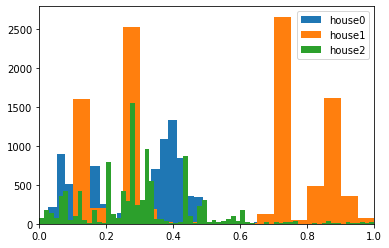

In [66]:
trainfile1="F:/NILM/training_data/Dishwasher_test_.csv"
trainfile2="F:/NILM/training_data/Dishwasher_house_2_training_.csv"
trainfile3="F:/NILM/training_data/Dishwasher_house_3_training_.csv"
fileList=[trainfile1,trainfile2,trainfile3]
threshold=200
x_list=[]
y_list=[]
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    print(X_on.shape)
    ridx = np.random.choice(X_on.shape[0], 10000)

    X_on= X_on[ridx]
    scaler_x = MinMaxScaler()
    X_on=X_on.reshape(-1,1)
    scaler_x.fit(X_on)
    X=scaler_x.transform(X_on)
    plt.hist(X,bins='auto',label='house'+str(i), histtype='stepfilled')
plt.xlim([0,1])
plt.legend()

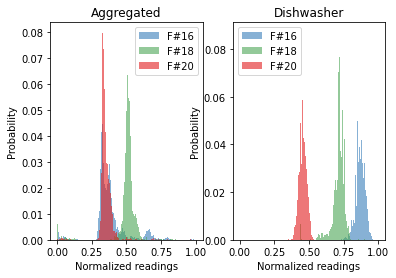

In [217]:
trainfile1="F:/NILM/refit_training/dishwasher/dishwasher_house_9_training_.csv"
trainfile2="F:/NILM/refit_training/dishwasher/dishwasher_house_13_training_.csv"
trainfile3="F:/NILM/refit_training/dishwasher/dishwasher_house_16_training_.csv"
trainfile4="F:/NILM/refit_training/dishwasher/dishwasher_house_18_training_.csv"
trainfile5="F:/NILM/refit_training/dishwasher/dishwasher_house_20_training_.csv"  
fileList=[trainfile3,trainfile4,trainfile5]
threshold=1000
house=['F#16','F#18','F#20']
x_list=[]
y_list=[]
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
# colorList=['#82b2d2','#f99b6c', '#f86c6c']
colorList=['#387dba','#4ba655', '#e21d1e']
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    ridx = np.random.choice(X_on.shape[0], 10000)
    X_on= X_on[ridx]
    scaler_x = MinMaxScaler()
    X_on=X_on.reshape(-1,1)
    scaler_x.fit(X_on)
    X=scaler_x.transform(X_on)
#     X=np.squeeze(X)
#     X=list(X)
    weights=np.ones(len(X)) / len(X)
    #ax1.hist(X,bins=300,label='house'+str(i),density=False,alpha = 0.7, color=colorList[i],weights=weights)
    ax1.hist(X,bins=300,label=str(house[i]),density=False,alpha = 0.6, color=colorList[i],weights=weights)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Normalized readings')
ax1.set_title('Aggregated')
plt.legend()    

ax2 = fig.add_subplot(1,2,2)    
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    Y_on=Y[Y>0]
    ridx = np.random.choice(Y_on.shape[0], 10000)
    Y_on= Y_on[ridx]
    scaler_y = MinMaxScaler()
    Y_on=Y_on.reshape(-1,1)
    scaler_y.fit(Y_on)
    Y=scaler_y.transform(Y_on)
    weights=np.ones(len(Y)) / len(Y)
    ax2.hist(Y,bins=300,label=str(house[i]),density=False,alpha = 0.6, color=colorList[i],weights=weights)
ax2.set_ylabel('Probability')
ax2.set_xlabel('Normalized readings')
ax2.set_title('Dishwasher')
plt.legend()
plt.show()

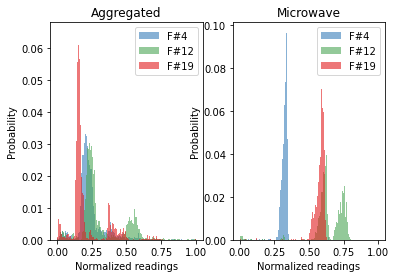

In [218]:
trainfile1="F:/NILM/refit_training/microwave/microwave_house_4_training_.csv"
trainfile2="F:/NILM/refit_training/microwave/microwave_house_10_training_.csv"
trainfile3="F:/NILM/refit_training/microwave/microwave_house_12_training_.csv"
trainfile4="F:/NILM/refit_training/microwave/microwave_house_17_training_.csv"
trainfile5="F:/NILM/refit_training/microwave/microwave_house_19_training_.csv"  
fileList=[trainfile1,trainfile3,trainfile5]
threshold=200
house=['F#4','F#12','F#19']
x_list=[]
y_list=[]
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
# colorList=['#82b2d2','#f99b6c', '#f86c6c']
colorList=['#387dba','#4ba655', '#e21d1e']
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    ridx = np.random.choice(X_on.shape[0], 10000)
    X_on= X_on[ridx]
    scaler_x = MinMaxScaler()
    X_on=X_on.reshape(-1,1)
    scaler_x.fit(X_on)
    X=scaler_x.transform(X_on)
#     X=np.squeeze(X)
#     X=list(X)
    weights=np.ones(len(X)) / len(X)
    #ax1.hist(X,bins=300,label='house'+str(i),density=False,alpha = 0.7, color=colorList[i],weights=weights)
    ax1.hist(X,bins=300,label=str(house[i]),density=False,alpha = 0.6, color=colorList[i],weights=weights)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Normalized readings')
ax1.set_title('Aggregated')
plt.legend()    

ax2 = fig.add_subplot(1,2,2)    
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    Y_on=Y[Y>0]
    ridx = np.random.choice(Y_on.shape[0], 10000)
    Y_on= Y_on[ridx]
    scaler_y = MinMaxScaler()
    Y_on=Y_on.reshape(-1,1)
    scaler_y.fit(Y_on)
    Y=scaler_y.transform(Y_on)
    weights=np.ones(len(Y)) / len(Y)
    ax2.hist(Y,bins=300,label=str(house[i]),density=False,alpha = 0.6, color=colorList[i],weights=weights)
ax2.set_ylabel('Probability')
ax2.set_xlabel('Normalized readings')
ax2.set_title('Microwave')
plt.legend()
plt.show()

<BarContainer object of 100 artists>

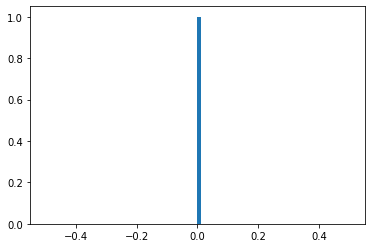

In [171]:
import matplotlib.pyplot as plt
import numpy as np

data = np.zeros((1000))
# Compute histogram
hist, bins = np.histogram(data, density=True, bins=100)
# Width of each bin
bins_w = np.diff(bins)
# Compute proportion of sample in each bin
hist_p = hist * bins_w
# Plot histogram
plt.bar(bins[:-1], hist_p, width=bins_w, align='edge')

(68958,)
(41138,)
(25870,)
03-08 22:57 [MainProcess, 10448] [WARNI]  No handles with labels found to put in legend.


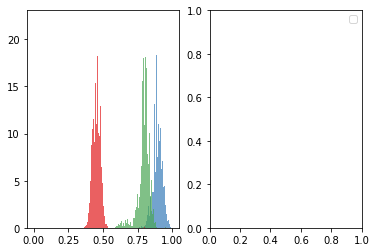

In [176]:
trainfile1="F:/NILM/refit_training/dishwasher/dishwasher_house_9_training_.csv"
trainfile2="F:/NILM/refit_training/dishwasher/dishwasher_house_13_training_.csv"
trainfile3="F:/NILM/refit_training/dishwasher/dishwasher_house_16_training_.csv"
trainfile4="F:/NILM/refit_training/dishwasher/dishwasher_house_18_training_.csv"
trainfile5="F:/NILM/refit_training/dishwasher/dishwasher_house_20_training_.csv"  
fileList=[trainfile3,trainfile4,trainfile5]
colorList=['#387dba','#4ba655', '#e21d1e']
threshold=1000
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    Y_on=Y[Y>0]
    print(Y_on.shape)
    ridx = np.random.choice(Y_on.shape[0], 10000)
    Y_on= Y_on[ridx]
    scaler_y = MinMaxScaler()
    Y_on=Y_on.reshape(-1,1)
    scaler_y.fit(Y_on)
    Y=scaler_y.transform(Y_on)
    ax1.hist(Y,bins='auto', density=True, label='house'+str(i),alpha = 0.7, color=colorList[i])
ax2 = fig.add_subplot(1,2,2)
plt.legend()

(68958,)
1.000000000000001
(41138,)
1.0000000000000036
(25870,)
1.0000000000000013


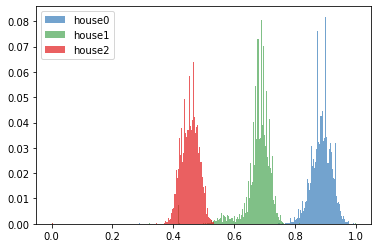

In [207]:
trainfile1="F:/NILM/refit_training/dishwasher/dishwasher_house_9_training_.csv"
trainfile2="F:/NILM/refit_training/dishwasher/dishwasher_house_13_training_.csv"
trainfile3="F:/NILM/refit_training/dishwasher/dishwasher_house_16_training_.csv"
trainfile4="F:/NILM/refit_training/dishwasher/dishwasher_house_18_training_.csv"
trainfile5="F:/NILM/refit_training/dishwasher/dishwasher_house_20_training_.csv"  
fileList=[trainfile3,trainfile4,trainfile5]
colorList=['#387dba','#4ba655', '#e21d1e']
threshold=1000

for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    Y_on=Y[Y>0]
    print(Y_on.shape)
    ridx = np.random.choice(Y_on.shape[0], 10000)
    Y_on= Y_on[ridx]
    scaler_y = MinMaxScaler()
    Y_on=Y_on.reshape(-1,1)
    scaler_y.fit(Y_on)
    Y=scaler_y.transform(Y_on)
    weights=np.ones(len(Y)) / len(Y)
    n, bins, _=plt.hist(Y,bins=300,label='house'+str(i),density=False,alpha = 0.7, color=colorList[i],weights=weights)
    print(np.sum(n))
plt.legend()

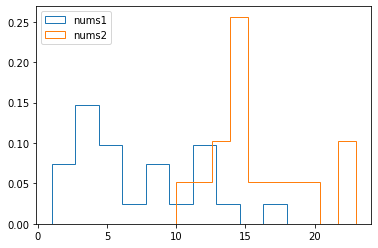

In [184]:
nums1 = [1,1,2,3,3,3,3,3,4,5,6,6,6,7,8,8,9,10,12,12,12,12,14,18]
nums2= [10,12,13,13,14,14,15,15,15,16,17,18,20,22,23]

fig,ax = plt.subplots() # Instantiate figure and axes object
ax.hist(nums1, label="nums1", histtype="step", density=True) # Plot histogram of nums1
ax.hist(nums2, label="nums2", histtype="step", density=True) # Plot histogram of nums2
plt.legend()
plt.show()

(46175,)
(15836,)
(12524,)


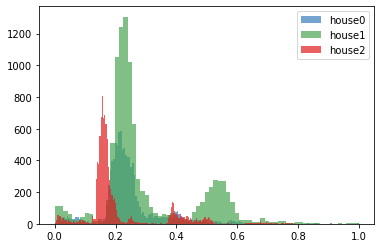

In [142]:
trainfile1="F:/NILM/refit_training/microwave/microwave_house_4_training_.csv"
trainfile2="F:/NILM/refit_training/microwave/microwave_house_10_training_.csv"
trainfile3="F:/NILM/refit_training/microwave/microwave_house_12_training_.csv"
trainfile4="F:/NILM/refit_training/microwave/microwave_house_17_training_.csv"
trainfile5="F:/NILM/refit_training/microwave/microwave_house_19_training_.csv"  
fileList=[trainfile1,trainfile3,trainfile5]
threshold=200
x_list=[]
y_list=[]
# colorList=['#82b2d2','#f99b6c', '#f86c6c']
colorList=['#387dba','#4ba655', '#e21d1e']
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    print(X_on.shape)
    ridx = np.random.choice(X_on.shape[0], 10000)

    X_on= X_on[ridx]
    scaler_x = MinMaxScaler()
    X_on=X_on.reshape(-1,1)
    scaler_x.fit(X_on)
    X=scaler_x.transform(X_on)
    plt.hist(X,bins='auto',label='house'+str(i),alpha = 0.7,color=colorList[i])
#     plt.hist(X,bins='auto',label='house'+str(i),alpha = 0.6)
plt.legend()

(46175,)
(15836,)
(12524,)


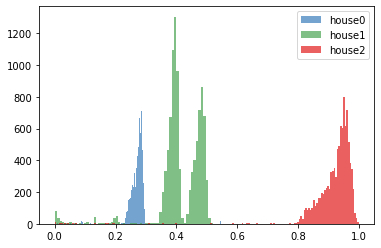

In [141]:
trainfile1="F:/NILM/refit_training/microwave/microwave_house_4_training_.csv"
trainfile2="F:/NILM/refit_training/microwave/microwave_house_10_training_.csv"
trainfile3="F:/NILM/refit_training/microwave/microwave_house_12_training_.csv"
trainfile4="F:/NILM/refit_training/microwave/microwave_house_17_training_.csv"
trainfile5="F:/NILM/refit_training/microwave/microwave_house_19_training_.csv"  
fileList=[trainfile1,trainfile3,trainfile5]
colorList=['#387dba','#4ba655', '#e21d1e']
threshold=200
x_list=[]
y_list=[]
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    Y_on=Y[Y>0]
    print(Y_on.shape)
    ridx = np.random.choice(Y_on.shape[0], 10000)
    Y_on= Y_on[ridx]
    scaler_y = MinMaxScaler()
    Y_on=Y_on.reshape(-1,1)
    scaler_y.fit(Y_on)
    Y=scaler_y.transform(Y_on)
    plt.hist(Y,bins='auto',label='house'+str(i),alpha = 0.7,color=colorList[i])
plt.legend()

(75667,)
(60777,)
(56270,)


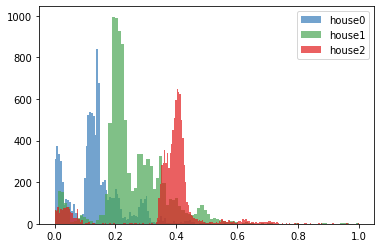

In [140]:
trainfile1="F:/NILM/refit_training/kettle/kettle_house_2_training_.csv"
trainfile2="F:/NILM/refit_training/kettle/kettle_house_3_training_.csv"
trainfile3="F:/NILM/refit_training/kettle/kettle_house_4_training_.csv"
trainfile4="F:/NILM/refit_training/kettle/kettle_house_5_training_.csv"
trainfile5="F:/NILM/refit_training/kettle/kettle_house_6_training_.csv"  
fileList=[trainfile2,trainfile4,trainfile5]
colorList=['#387dba','#4ba655', '#e21d1e']
threshold=500
x_list=[]
y_list=[]
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    print(X_on.shape)
    ridx = np.random.choice(X_on.shape[0], 10000)

    X_on= X_on[ridx]
    scaler_x = MinMaxScaler()
    X_on=X_on.reshape(-1,1)
    scaler_x.fit(X_on)
    X=scaler_x.transform(X_on)
    plt.hist(X,bins='auto',label='house'+str(i),alpha = 0.7, color=colorList[i])
plt.legend()

(75823,)
(60892,)
(56377,)


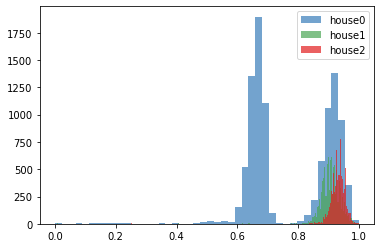

In [150]:
trainfile1="F:/NILM/refit_training/kettle/kettle_house_2_training_.csv"
trainfile2="F:/NILM/refit_training/kettle/kettle_house_3_training_.csv"
trainfile3="F:/NILM/refit_training/kettle/kettle_house_4_training_.csv"
trainfile4="F:/NILM/refit_training/kettle/kettle_house_5_training_.csv"
trainfile5="F:/NILM/refit_training/kettle/kettle_house_6_training_.csv"  
fileList=[trainfile2,trainfile4,trainfile5]
colorList=['#387dba','#4ba655', '#e21d1e']
threshold=200
x_list=[]
y_list=[]
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    Y_on=Y[Y>0]
    print(Y_on.shape)
    ridx = np.random.choice(Y_on.shape[0], 10000)
    Y_on= Y_on[ridx]
    scaler_y = MinMaxScaler()
    Y_on=Y_on.reshape(-1,1)
    scaler_y.fit(Y_on)
    Y=scaler_y.transform(Y_on)
    plt.hist(Y,bins='auto',label='house'+str(i),alpha = 0.7, color=colorList[i])
plt.legend()

(3738371,)
(3017622,)
(1939629,)


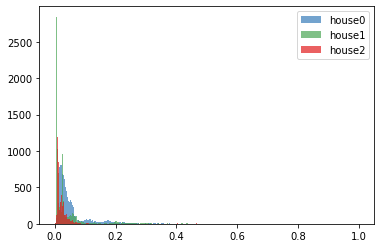

In [154]:
trainfile1="F:/NILM/refit_training/fridge/fridge_house_2_training_.csv"
trainfile2="F:/NILM/refit_training/fridge/fridge_house_5_training_.csv"
trainfile3="F:/NILM/refit_training/fridge/fridge_house_9_training_.csv"
trainfile4="F:/NILM/refit_training/fridge/fridge_house_12_training_.csv"
trainfile5="F:/NILM/refit_training/fridge/fridge_house_15_training_.csv"  
fileList=[trainfile2,trainfile3,trainfile5]

colorList=['#387dba','#4ba655', '#e21d1e']
threshold=50
x_list=[]
y_list=[]
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    print(X_on.shape)
    ridx = np.random.choice(X_on.shape[0], 10000)

    X_on= X_on[ridx]
    scaler_x = MinMaxScaler()
    X_on=X_on.reshape(-1,1)
    scaler_x.fit(X_on)
    X=scaler_x.transform(X_on)
    plt.hist(X,bins='auto',label='house'+str(i),alpha = 0.7, color=colorList[i])
    
    #plt.hist(X,bins='auto',label='house'+str(i),alpha = 0.7)
plt.legend()

(63911,)
(81351,)
(67400,)


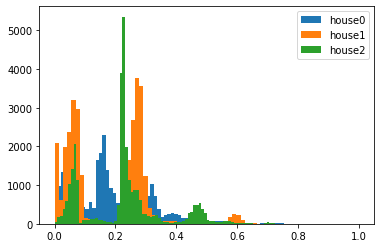

In [83]:
trainfile1="F:/NILM/refit_training/washingmachine/washingmachine_house_9_training_.csv"
trainfile2="F:/NILM/refit_training/washingmachine/washingmachine_house_15_training_.csv"
trainfile3="F:/NILM/refit_training/washingmachine/washingmachine_house_16_training_.csv"
# trainfile4="F:/NILM/refit_training/washingmachine/washingmachine_house_17_training_.csv"
# trainfile5="F:/NILM/refit_training/washingmachine/washingmachine_house_18_training_.csv"  
fileList=[trainfile1,trainfile2,trainfile3]
threshold=200
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    print(X_on.shape)
    ridx = np.random.choice(X_on.shape[0], 30000)

    X_on= X_on[ridx]
    scaler_x = MinMaxScaler()
    X_on=X_on.reshape(-1,1)
    scaler_x.fit(X_on)
    X=scaler_x.transform(X_on)
    plt.hist(X,bins='auto',label='house'+str(i))
plt.legend()

(2278677,)
(3738371,)
(3017622,)
(1846519,)
(1939629,)


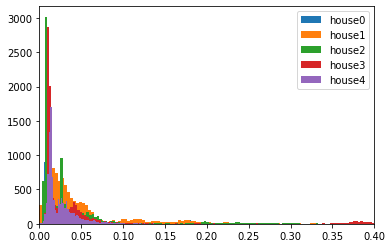

In [58]:
trainfile1="F:/NILM/refit_training/fridge/fridge_house_2_training_.csv"
trainfile2="F:/NILM/refit_training/fridge/fridge_house_5_training_.csv"
trainfile3="F:/NILM/refit_training/fridge/fridge_house_9_training_.csv"
trainfile4="F:/NILM/refit_training/fridge/fridge_house_12_training_.csv"
trainfile5="F:/NILM/refit_training/fridge/fridge_house_15_training_.csv"  
fileList=[trainfile1,trainfile2,trainfile3,trainfile4,trainfile5]
threshold=50
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    print(X_on.shape)
    ridx = np.random.choice(X_on.shape[0], 10000)

    X_on= X_on[ridx]
    scaler_x = MinMaxScaler()
    X_on=X_on.reshape(-1,1)
    scaler_x.fit(X_on)
    X=scaler_x.transform(X_on)
    plt.hist(X,bins='auto',label='house'+str(i))
plt.xlim([0,0.4])
plt.legend()

In [ ]:
trainfile1="F:/NILM/refit_training/dishwasher/dishwasher_house_9_training_.csv"
trainfile2="F:/NILM/refit_training/dishwasher/dishwasher_house_13_training_.csv"
trainfile3="F:/NILM/refit_training/dishwasher/dishwasher_house_16_training_.csv"
trainfile4="F:/NILM/refit_training/dishwasher/dishwasher_house_18_training_.csv"
trainfile5="F:/NILM/refit_training/dishwasher/dishwasher_house_20_training_.csv"  
fileList=[trainfile3,trainfile4,trainfile5]
threshold=1000
x_list=[]
y_list=[]
# colorList=['#82b2d2','#f99b6c', '#f86c6c']
colorList=['#387dba','#4ba655', '#e21d1e']
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    Y_on=Y[Y>0]
    print(X_on.shape)
    ridx = np.random.choice(X_on.shape[0], 10000)

    X_on= X_on[ridx]
    scaler_x = MinMaxScaler()
    X_on=X_on.reshape(-1,1)
    scaler_x.fit(X_on)
    X=scaler_x.transform(X_on)
    plt.hist(X,bins='auto',label='house'+str(i),alpha = 0.6,color=colorList[i])
plt.legend()

03-09 10:02 [MainProcess, 11368] [DEBUG]  Loaded backend nbAgg version unknown.
Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib
03-09 10:02 [MainProcess, 11368] [DEBUG]  Loaded backend nbAgg version unknown.


<IPython.core.display.Javascript object>


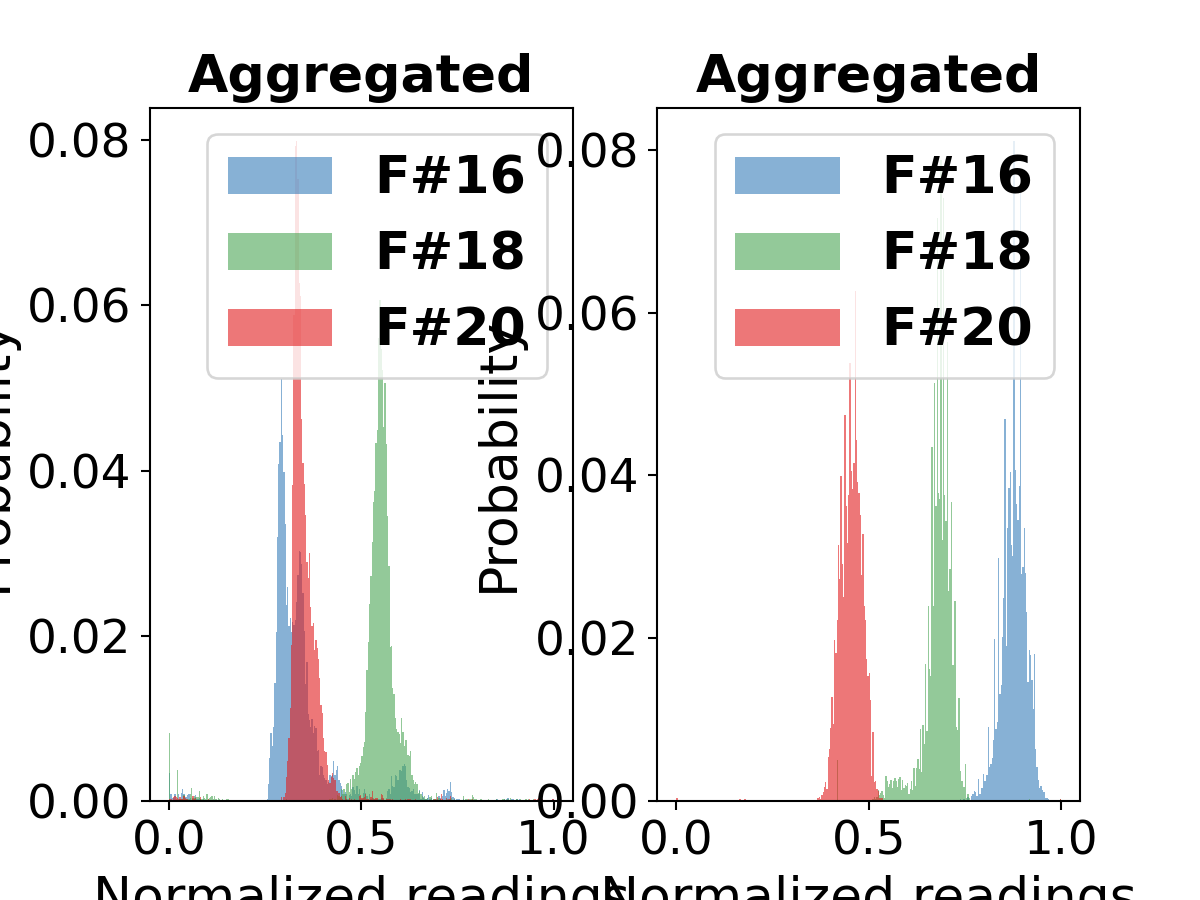

In [5]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# %matplotlib notebook

import numpy as np
# from model import MDANet

import matplotlib.pyplot as plt
%pylab
%matplotlib qt5
from sklearn.preprocessing import MinMaxScaler
#####################################################Regression#######################################
import pandas as pd

def Aggdata(file,threshold):
    dataframe=pd.read_csv(file,header=0)
    np_array=np.array(dataframe)
    inputs, targets=np_array[:, 0], np_array[:, 1]
    targets[targets<=threshold]=0
#     targets[targets>threshold1]=0
    return inputs,targets

trainfile1="F:/NILM/refit_training/dishwasher/dishwasher_house_9_training_.csv"
trainfile2="F:/NILM/refit_training/dishwasher/dishwasher_house_13_training_.csv"
trainfile3="F:/NILM/refit_training/dishwasher/dishwasher_house_16_training_.csv"
trainfile4="F:/NILM/refit_training/dishwasher/dishwasher_house_18_training_.csv"
trainfile5="F:/NILM/refit_training/dishwasher/dishwasher_house_20_training_.csv"
fileList=[trainfile3,trainfile4,trainfile5]
threshold=1000
house=['F#16','F#18','F#20']
x_list=[]
y_list=[]
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
# colorList=['#82b2d2','#f99b6c', '#f86c6c']
colorList=['#387dba','#4ba655', '#e21d1e']
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    X_on=X[Y>0]
    ridx = np.random.choice(X_on.shape[0], 10000)
    X_on= X_on[ridx]
    scaler_x = MinMaxScaler()
    X_on=X_on.reshape(-1,1)
    scaler_x.fit(X_on)
    X=scaler_x.transform(X_on)
#     X=np.squeeze(X)
#     X=list(X)
    weights=np.ones(len(X)) / len(X)
    #ax1.hist(X,bins=300,label='house'+str(i),density=False,alpha = 0.7, color=colorList[i],weights=weights)
    ax1.hist(X,bins=300,label=str(house[i]),density=False,alpha = 0.6, color=colorList[i],weights=weights)
ax1.set_ylabel('Probability',fontsize=20)
ax1.set_xlabel('Normalized readings',fontsize=20)
ax1.set_title('Aggregated',fontsize=20, weight='semibold')
ax1.tick_params(labelsize=18)
plt.legend(prop={'size': 20,'weight':'semibold'})

ax2 = fig.add_subplot(1,2,2)
for i in range(len(fileList)):
    X,Y=Aggdata(fileList[i],threshold)
    Y_on=Y[Y>0]
    ridx = np.random.choice(Y_on.shape[0], 10000)
    Y_on= Y_on[ridx]
    scaler_y = MinMaxScaler()
    Y_on=Y_on.reshape(-1,1)
    scaler_y.fit(Y_on)
    Y=scaler_y.transform(Y_on)
    weights=np.ones(len(Y)) / len(Y)
    ax2.hist(Y,bins=300,label=str(house[i]),density=False,alpha = 0.6, color=colorList[i],weights=weights)
ax2.set_ylabel('Probability',fontsize=20)
ax2.set_xlabel('Normalized readings',fontsize=20)
ax2.set_title('Aggregated',fontsize=20, weight='semibold')
ax2.tick_params(labelsize=18)
plt.legend(prop={'size': 20,'weight':'semibold'})
plt.show()